C:/Users/ta/Desktop/treated_Siwafer/test1.csv
Au-ENP 60nm BBI Solution    16.305028
Zero_column(temp)            0.000000
dtype: float64
       Au-ENP 60nm BBI Solution  Zero_column(temp)
count              19632.000000            19905.0
mean                  16.305028                0.0
std                  329.214229                0.0
min                    0.000000                0.0
25%                    0.000000                0.0
50%                    0.000000                0.0
75%                    0.000000                0.0
max                15010.000000                0.0
       Au-ENP 60nm BBI Solution  Zero_column(temp)
count                273.000000                0.0
mean               38493.846154                NaN
std                13958.057743                NaN
min                16350.000000                NaN
25%                30380.000000                NaN
50%                36740.000000                NaN
75%                44440.000000                

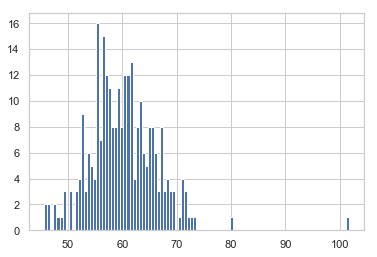

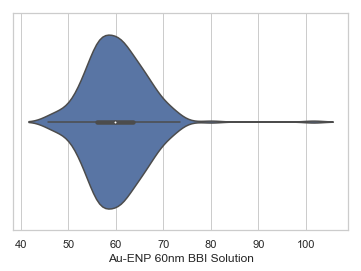

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from tkinter import Tk
from tkinter.filedialog import askopenfilename

#select input file
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
file = str(askopenfilename()) # show an "Open" dialog box and return the path to the selected file
print(file)

#file = pd.read_csv("C:/Users/ta/Desktop/treated_Siwafer/test1.csv")
file = pd.read_csv(file)

#elemental density (g/ml)

Au = 19.3
Ag = 10.49
TiO2 = 4.23

#particle mass concentraiton
mass_con = 50 # ng/L

#particle diameter

diameter = 60 # nm

# variables of experiment 
sample_flow = 0.4 # ml/min
dwell_time = 2  # ms 

# response factor from calibration sheet(this is currently done manually)
#simply input the slope of the best fit line from the your calibration sheet
response = 48467 # cps/(ug/L)
 
#limit for particle detection
limit = 16205

# defines background based on cps limit set point 
def background():
    background = file
    
    background = background[~(background >= limit)]
    
    df_mean = background.mean()
    print(df_mean)
    print(background.describe())
    
    return background , df_mean

df_background, df_mean = background()

def particles():
    particles = file.where(file >= limit)
    particles_mean = particles.mean()
    particles_mean1 = particles.iloc[:,0].mean()
    particles_mean2 = particles.iloc[:,1].mean()
    print(particles.describe(), particles_mean1)
    
    return particles, particles_mean1, particles_mean2 , particles_mean

    
df_particles, df_particles_mean, df_particles_mean1, df_particles_mean2 = particles()

def transport_effieceny():
    transport = df_particles.count()
    x_trans = transport 
    x_cal = x_trans/((mass_con*1000/2.18)*sample_flow)
    print(x_cal)
    print(x_trans)
    return x_cal
trasnport = transport_effieceny()

def particle_mass ():
    y = df_particles_mean
    particle_mass = df_particles.apply(lambda x: x/y*(2.18))
    print(particle_mass.describe())
    return particle_mass
df_particle_mass = particle_mass()


mean = df_particles_mean 
def size_diameter():
    x_1 = df_particle_mass
    x_1 = x_1.apply(lambda x: ((6*x/1000000000000000/3.14/19.3)**0.333)*10000000)
   
    #x_1.to_csv("C:/Users/ta/Desktop/treated_Siwafer/test2_size_out2.csv")
    
    print(x_1.describe())
    return x_1


df_size_diameter = size_diameter()

df_size_diameter.iloc[:,0].hist(bins=100)
plt.figure()



sns.set(style="whitegrid")
ax = sns.violinplot(df_size_diameter.iloc[:,0], scale="count")
plt.figure()

def concentration():
    concentraton_particle_number =  (df_particles_mean1/trasnport)
    return concentraton_particle_number
print(concentration())
    
plt.figure()

plt.show()

max    671.693157
dtype: float64
                max
count  39074.000000
mean      62.834204
std       77.245930
min       15.041728
25%       30.073834
50%       38.289444
75%       49.233579
max      641.822421


C:\Users\ta\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Au-ENP 60nm BBI Solution    1.080705e+08
Zero_column(temp)                    inf
dtype: float64


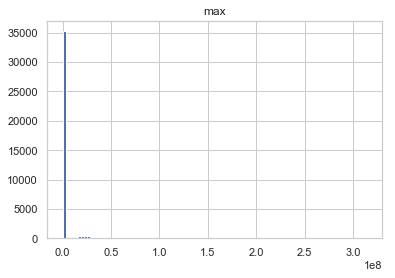

<Figure size 432x288 with 0 Axes>

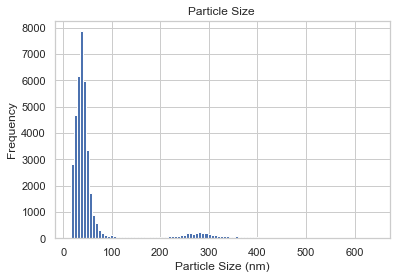

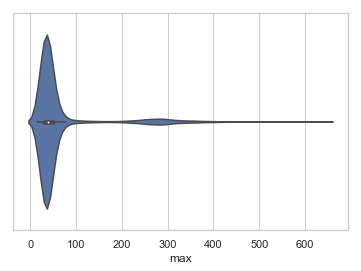

<Figure size 432x288 with 0 Axes>

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

file = pd.read_excel("C:/Users/ta/Desktop/output_files/new_2018-12-12-soil-laser-ablation-AU_1.xlsx")



# response factor from calibration sheet
response = 48467 # cps/(ug/L)

#limit for particle detection
limit = 4000

# defines background based on cps limit set point 
def background():
    background = file
    
    background = background[~(background >= limit)]
    
    df_mean = background.mean()
    print(df_mean)
    #print(background.describe())
    
    return background , df_mean

df_background, df_mean = background()

def particles():
    particles = file.where(file >= limit)
    particles_mean = particles.mean()
    particles_mean1 = particles.iloc[:,0].mean()
    #particles_mean2 = particles.iloc[:,1].mean()
    #print(particles.describe(), particles_mean1)
    
    return particles, particles_mean1 , particles_mean

    
df_particles, df_particles_mean, df_particles_mean1 = particles()



def particle_mass ():
    y = df_particles_mean
    molar_ratio = 1
    #particle_mass = df_particles.apply(lambda x: x/y*(2.18))
    particle_mass = df_particles.apply(lambda x: (x*dwell_time/1000/response)*(sample_flow*0.03*molar_ratio/60*1000000))
    #print(particle_mass.describe())
    return particle_mass
df_particle_mass = particle_mass()


mean = df_particles_mean 
def size_diameter():
    x_1 = df_particle_mass
    x_1 = x_1.apply(lambda x: ((6*x/1000000000000000/3.14/19.3)**0.333)*10000000)
   
    x_1.to_csv("C:/Users/ta/Desktop/treated_Siwafer/test2_size_out2.csv")
    
    print(x_1.describe())
    return x_1
df_size_diameter = size_diameter()

df_particles.hist(bins=100)
plt.figure()

df_size_diameter.hist(bins=100)
plt.title("Particle Size ")
plt.xlabel("Particle Size (nm)")
plt.ylabel("Frequency")
plt.figure()

frequency = df_size_diameter.iloc[:,0].value_counts(bins= 10)


sns.set(style="whitegrid")
ax = sns.violinplot(df_size_diameter.iloc[:,0], scale="count")

plt.figure

def concentration():
    concentraton_particle_number =  (df_particles_mean/trasnport)
    return concentraton_particle_number
print(concentration())
    
plt.figure()

plt.show()

